### 딥-러닝 과정 CNN 

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


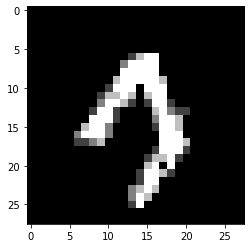

In [2]:
# 2. 이미지 데이터 확인하기 🖼
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(x_train[340], cmap=plt.cm.gray)


In [3]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_train[0])

(60000, 28, 28, 1)
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  

In [4]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [5]:
# 4. Label 전처리 (one-hot encoding) 

from tensorflow.keras import utils


y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [17]:
# 5. 모델 생성 : CNN 🌟🌟🌟
from keras.layers import Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

#(filters=128, kernel_size=(3,3), padding='same')
model= keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=x_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))


model.add(Dense(10, Activation("softmax")))



In [18]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [19]:
from keras.callbacks import EarlyStopping

# 빠른 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
# 7. 모델 학습시키기
hist = model.fit(x_train,y_train,batch_size=200,epochs=20,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/20
240/240 [==============================] - 20s 82ms/step - loss: 0.3244 - accuracy: 0.9061 - val_loss: 0.0789 - val_accuracy: 0.9772
Epoch 2/20
240/240 [==============================] - 19s 80ms/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 3/20
240/240 [==============================] - 19s 79ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0496 - val_accuracy: 0.9854
Epoch 4/20
240/240 [==============================] - 19s 79ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0396 - val_accuracy: 0.9882
Epoch 5/20
240/240 [==============================] - 19s 79ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0371 - val_accuracy: 0.9891
Epoch 6/20
240/240 [==============================] - 19s 79ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0409 - val_accuracy: 0.9873
Epoch 7/20
240/240 [==============================] - 19s 79ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0333 - val_accuracy:

In [21]:
# 8. 모델 평가하기
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0324 - accuracy: 0.9921


[0.03242919594049454, 0.9921000003814697]

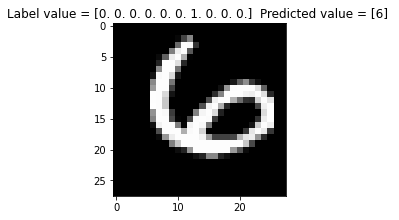

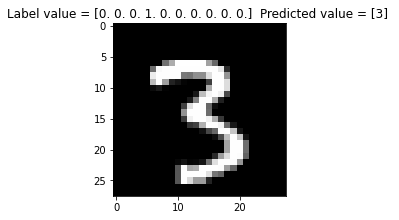

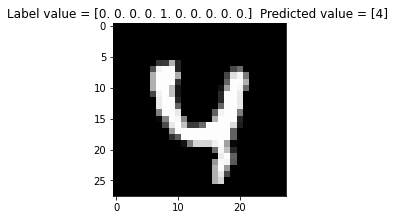

In [22]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = x_test[index].reshape(1, 28,28,1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = x_test
    plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()

In [ ]:
# 10. 학습 시각화하기
